In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import random
import warnings
from datetime import datetime
from scipy.stats import chisquare # type: ignore
from scipy.stats import ttest_ind # type: ignore
from scipy.stats import t # type: ignore
from scipy.stats import norm # type: ignore
from scipy.stats import zscore # type: ignore
import statsmodels.api as sm # type: ignore
import sklearn as sk # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.linear_model import LogisticRegression as LR # type: ignore

# EDA

In [ ]:
# Load in the data and select only data from Democrats and Republicans
data = pd.read_csv("cleaned_data.csv")
data_dem_rep = data[(data['com_party'] == 'DEM') | (data['com_party'] == 'REP')]

Text(0.5, 1.0, 'Contributions ($) By Party Before and After the BCRA (excluding outliers)')

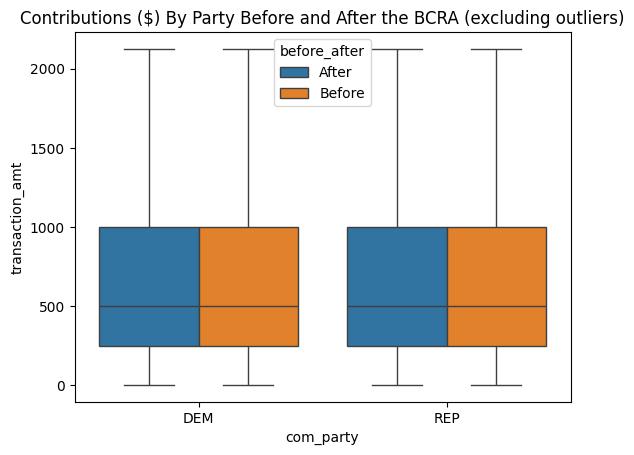

In [4]:
sns.boxplot(data=data_dem_rep, x='com_party', y='transaction_amt', hue='before_after', showfliers=False)
plt.title('Contributions ($) By Party Before and After the BCRA (excluding outliers)')

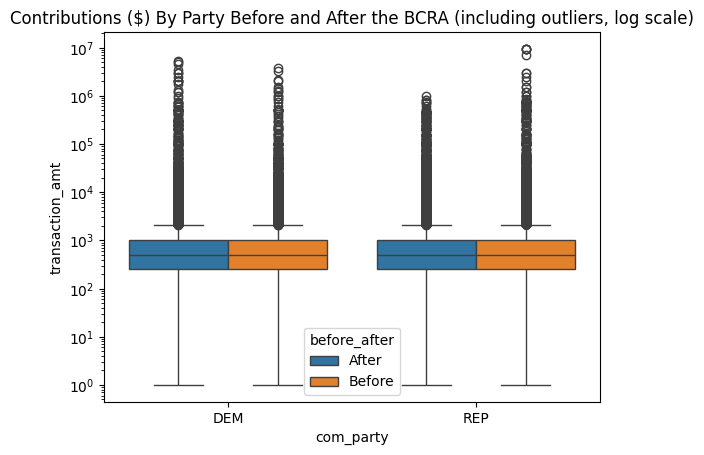

In [6]:
sns.boxplot(data=data_dem_rep, x='com_party', y='transaction_amt', hue='before_after', showfliers=True)
plt.title('Contributions ($) By Party Before and After the BCRA (including outliers, log scale)')
plt.yscale('log')

In [8]:
# Computing average contributions before and after the BCRA for Democrats and Republicans
avg_dem_b = np.mean(data[(data['com_party'] == 'DEM') & (data['before_after'] == 'Before')]['transaction_amt'])
avg_dem_a = np.mean(data[(data['com_party'] == 'DEM') & (data['before_after'] == 'After')]['transaction_amt'])
avg_rep_b = np.mean(data[(data['com_party'] == 'REP') & (data['before_after'] == 'Before')]['transaction_amt'])
avg_rep_a = np.mean(data[(data['com_party'] == 'REP') & (data['before_after'] == 'After')]['transaction_amt'])

float(avg_dem_b), float(avg_dem_a), float(avg_rep_b), float(avg_rep_a)

(745.5963110857577, 900.3784463737035, 711.2438791051231, 910.8101448094283)

In [10]:
# Trimming outliers from the data, defined as transactions greater than $3000 and checking the proportion of data that is retained
data_trim = data[data['transaction_amt'] < 3000]
display(len(data), len(data_trim), len(data_trim)/len(data))

6004416

5894896

0.9817600912395144

Text(0, 0.5, 'Density')

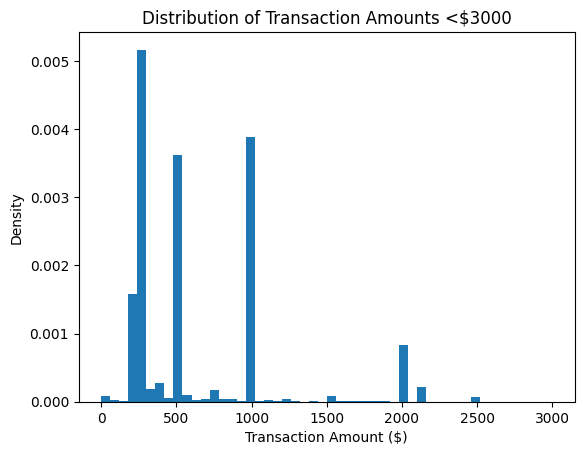

In [11]:
plt.hist(data=data_trim, x='transaction_amt', bins=50, density=True)
plt.title('Distribution of Transaction Amounts <$3000')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Density')

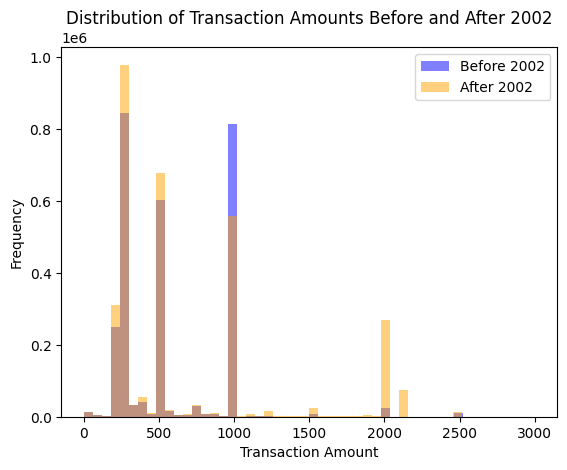

In [12]:
data_trim_b = data_trim[data_trim['before_after'] == 'Before']['transaction_amt']
data_trim_a = data_trim[data_trim['before_after'] == 'After']['transaction_amt']

# Histogram for before 2002
plt.hist(data_trim_b, bins=50, alpha=0.5, color='blue', label='Before 2002')

# Histogram for after 2002
plt.hist(data_trim_a, bins=50, alpha=0.5, color='orange', label='After 2002')

# Add legend and labels
plt.legend()
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts Before and After 2002')
plt.show()

In [13]:
# Load in democrat candidate data and select only columns that are relevant
dem_cand = pd.read_csv("dem_candidates.csv")
keep_cols = ['State', 'District', 'Office Type', 'Partisan Lean', 'Primary %',
            'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?']

democrats_subset = dem_cand[keep_cols].dropna()

In [14]:
# Encoding categorical variables
label_encoder = LabelEncoder()

democrats_subset['State Encoded'] = label_encoder.fit_transform(democrats_subset['State'])
democrats_subset['District Encoded'] = label_encoder.fit_transform(democrats_subset['District'])
democrats_subset['Office Type Encoded'] = label_encoder.fit_transform(democrats_subset['Office Type'])
democrats_subset['Veteran?'] = label_encoder.fit_transform(democrats_subset['Veteran?'])
democrats_subset['LGBTQ?'] = label_encoder.fit_transform(democrats_subset['LGBTQ?'])
democrats_subset['Elected Official?'] = label_encoder.fit_transform(democrats_subset['Elected Official?'])
democrats_subset['Self-Funder?'] = label_encoder.fit_transform(democrats_subset['Self-Funder?'])
democrats_subset['STEM?'] = label_encoder.fit_transform(democrats_subset['STEM?'])
democrats_subset['Obama Alum?'] = label_encoder.fit_transform(democrats_subset['Obama Alum?'])

democrats_subset = democrats_subset.drop(columns=["District", "Office Type", "State"])

'''
democrats_subset['Party Support?'] = label_encoder.fit_transform(democrats_subset['Party Support?'])
democrats_subset['Emily Endorsed?'] = label_encoder.fit_transform(democrats_subset['Emily Endorsed?'])
democrats_subset['Guns Sense Candidate?'] = label_encoder.fit_transform(democrats_subset['Guns Sense Candidate?'])
democrats_subset['Biden Endorsed?'] = label_encoder.fit_transform(democrats_subset['Biden Endorsed?'])
democrats_subset['Warren Endorsed? '] = label_encoder.fit_transform(democrats_subset['Warren Endorsed? '])
democrats_subset['Sanders Endorsed?'] = label_encoder.fit_transform(democrats_subset['Sanders Endorsed?'])
democrats_subset['Our Revolution Endorsed?'] = label_encoder.fit_transform(democrats_subset['Our Revolution Endorsed?'])
democrats_subset['Justice Dems Endorsed?'] = label_encoder.fit_transform(democrats_subset['Justice Dems Endorsed?'])
democrats_subset['PCCC Endorsed?'] = label_encoder.fit_transform(democrats_subset['PCCC Endorsed?'])
democrats_subset['Indivisible Endorsed?'] = label_encoder.fit_transform(democrats_subset['Indivisible Endorsed?'])
democrats_subset['WFP Endorsed?'] = label_encoder.fit_transform(democrats_subset['WFP Endorsed?'])
democrats_subset['VoteVets Endorsed?'] = label_encoder.fit_transform(democrats_subset['VoteVets Endorsed?'])
democrats_subset['No Labels Support?'] = label_encoder.fit_transform(democrats_subset['No Labels Support?'])
'''

"\ndemocrats_subset['Party Support?'] = label_encoder.fit_transform(democrats_subset['Party Support?'])\ndemocrats_subset['Emily Endorsed?'] = label_encoder.fit_transform(democrats_subset['Emily Endorsed?'])\ndemocrats_subset['Guns Sense Candidate?'] = label_encoder.fit_transform(democrats_subset['Guns Sense Candidate?'])\ndemocrats_subset['Biden Endorsed?'] = label_encoder.fit_transform(democrats_subset['Biden Endorsed?'])\ndemocrats_subset['Warren Endorsed? '] = label_encoder.fit_transform(democrats_subset['Warren Endorsed? '])\ndemocrats_subset['Sanders Endorsed?'] = label_encoder.fit_transform(democrats_subset['Sanders Endorsed?'])\ndemocrats_subset['Our Revolution Endorsed?'] = label_encoder.fit_transform(democrats_subset['Our Revolution Endorsed?'])\ndemocrats_subset['Justice Dems Endorsed?'] = label_encoder.fit_transform(democrats_subset['Justice Dems Endorsed?'])\ndemocrats_subset['PCCC Endorsed?'] = label_encoder.fit_transform(democrats_subset['PCCC Endorsed?'])\ndemocrats_sub

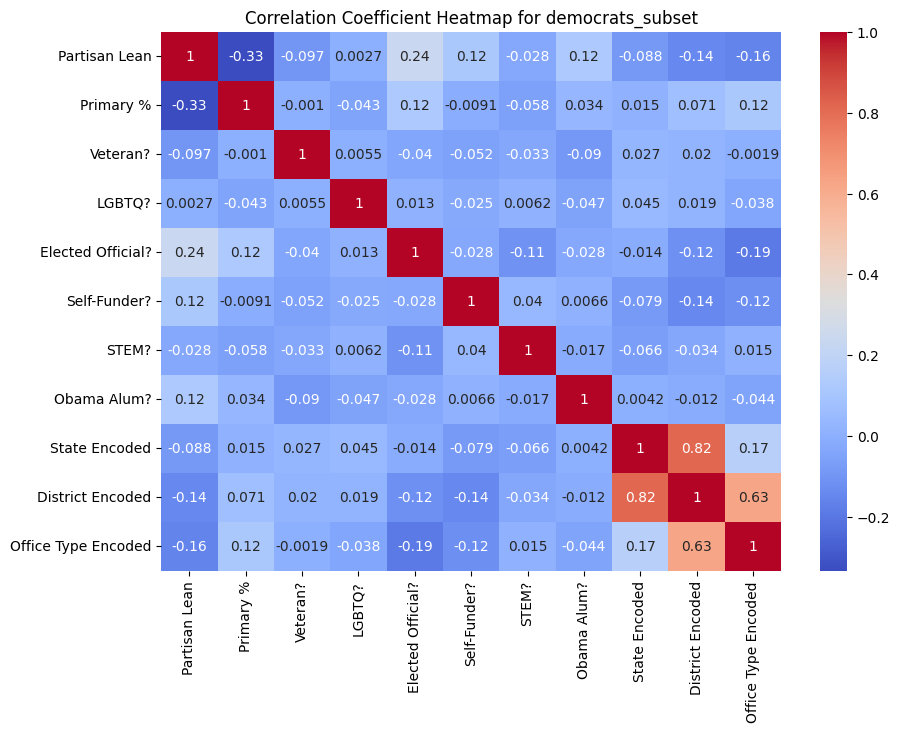

In [18]:
correlation_matrix = democrats_subset.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Coefficient Heatmap for democrats_subset')
plt.show()

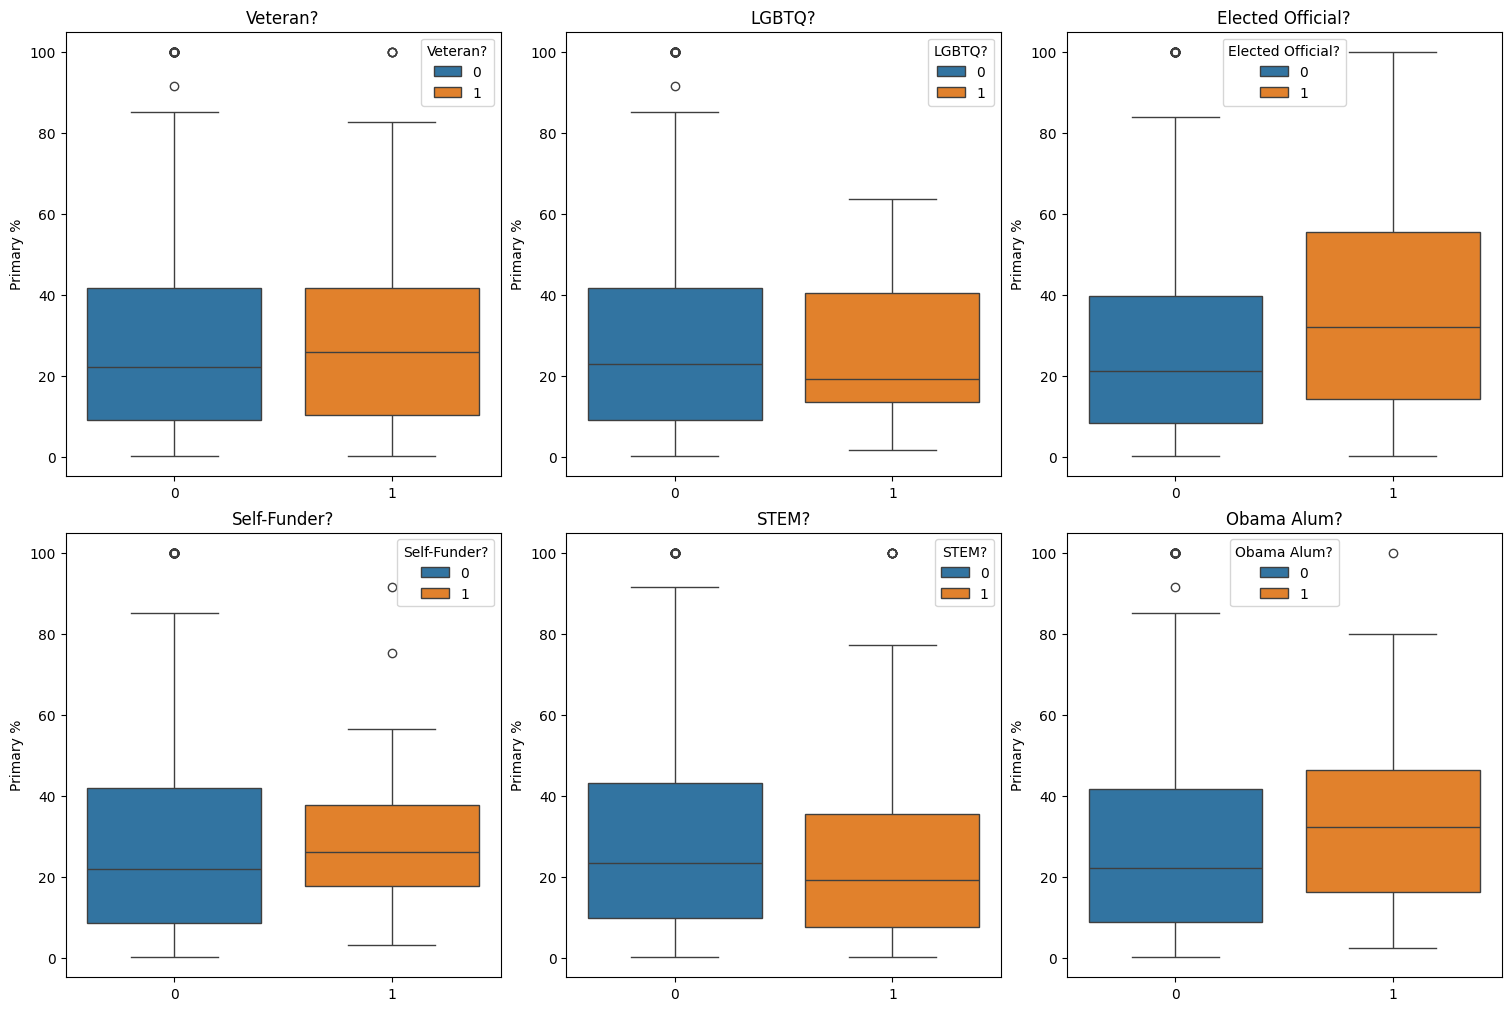

In [22]:
# Define your dataset and the list of binary variables
binary_vars = ['Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?']
y_var = 'Primary %'

# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(binary_vars) // n_cols)  # Compute rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), constrained_layout=True)

# Flatten axes for easy iteration (works even if n_cols * n_rows > len(binary_vars))
axes = axes.flatten()

# Loop through each binary variable to plot
for i, x_var in enumerate(binary_vars):
    sns.boxplot(data=democrats_subset, x=x_var, y=y_var, hue=x_var, showfliers=True, ax=axes[i])
    axes[i].set_title(x_var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(y_var)

# Turn off any empty subplot axes
for i in range(len(binary_vars), len(axes)):
    axes[i].axis('off')

plt.show()

# Causal Inference

In [88]:
democrats = pd.read_csv('dem_candidates.csv') # Only have to run once when starting notebook

In [89]:
# Selecting revelant columns
main_cols = ['State', 'District', 'Office Type', 'Partisan Lean', 'Primary %', 'Race',
            'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?']

endorsements = ["Party Support?", "Emily Endorsed?", "Guns Sense Candidate?"]

keep_cols = main_cols + endorsements

democrats_subset = democrats[keep_cols].dropna()

In [90]:
# Identify categorical columns
categorical_columns = democrats_subset.select_dtypes(include=['object']).columns

democrats_encoded = democrats_subset[["Primary %", "Partisan Lean"]]

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    democrats_encoded[col] = le.fit_transform(democrats_subset[col])
    label_encoders[col] = le

C:\Users\david\AppData\Local\Temp\ipykernel_11596\1594185406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_encoded[col] = le.fit_transform(democrats_subset[col])
C:\Users\david\AppData\Local\Temp\ipykernel_11596\1594185406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats_encoded[col] = le.fit_transform(democrats_subset[col])
C:\Users\david\AppData\Local\Temp\ipykernel_11596\1594185406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

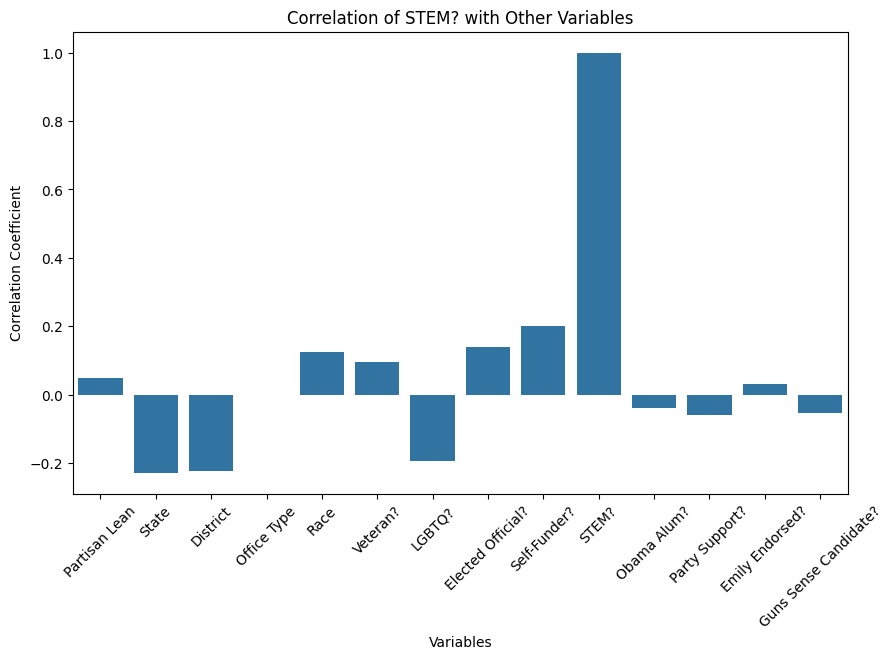

In [92]:
# Filter out 'Primary %' column and calculate correlations for STEM? column
stem_correlations = democrats_encoded.drop(columns=['Primary %']).corr()['STEM?']

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=stem_correlations.index, y=stem_correlations.values)
plt.title('Correlation of STEM? with Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

In [93]:
# DEFINE FUNCTIONS
def do_model(treatment, outcome, features, data):

    treatment_model = sm.Logit(data[treatment], data[features]).fit()
    
    return treatment_model

def add_pscores(model, data, features, treatment):
    if 'p_score' in data.columns:
        data = data.drop(columns=['p_score'])

    p_score = model.predict(data[features])
    data[treatment + " " + "p_score"] = p_score

    return data

def estimate_treatment_effect(data, x, y, z): 
    treated_outcome = data[data[z] == 1][y].values
    treated_p_score = data[data[z] == 1][z + " p_score"].values
    control_outcome = data[data[z] == 0][y].values
    control_p_score = data[data[z] == 0][z + " p_score"].values

    treated = np.sum(treated_outcome/treated_p_score)
    control = np.sum(control_outcome/(1 - control_p_score))

    n = len(y)
    
    return 1/n * (treated - control)

def trimmed_estimate(data, z, lower_bound, upper_bound):
    trimmed = data[(data[z + ' p_score'] > lower_bound) & (data[z + ' p_score'] < upper_bound)]
    n = trimmed.shape[0]
    treated = trimmed[trimmed[z] == 1]
    control = trimmed[trimmed[z] == 0]
    trimmed_ipw_estimate = 1/n * (np.sum(treated['Primary %'] / treated[z + ' p_score']) - np.sum(control['Primary %'] / (1 - control[z + ' p_score'])))
    return trimmed_ipw_estimate

In [94]:
# Choose relevant features
stem_cols = ["Partisan Lean", "State", "District", "Race", "Veteran?", "LGBTQ?", "Elected Official?", "Self-Funder?"]
stem_cols

['Partisan Lean',
 'State',
 'District',
 'Race',
 'Veteran?',
 'LGBTQ?',
 'Elected Official?',
 'Self-Funder?']

In [95]:
# Execute the model
stem_data = democrats_encoded.copy(deep=True)
stem_model = do_model("STEM?", "Primary %", stem_cols, stem_data)
stem_model.summary()

Optimization terminated successfully.
         Current function value: 0.568809
         Iterations 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  STEM?   No. Observations:                   54
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1488
Time:                        19:03:46   Log-Likelihood:                -30.716
converged:                       True   LL-Null:                       -36.085
Covariance Type:            nonrobust   LLR p-value:                    0.1504
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Partisan Lean        -0.0774      0.095     -0.812      0.417      -0.264       0.109
State                 0.1720      0.481      0.357      0.721      -0.771       1.115
District             -0.3243      0.218     -1.490      0.136      -0.751       0.102
Race                  0.6802      0.663      1.026      0.305      -0.619       1.979
Veteran?              1.0218      0.952      1.074      0.283      -0.843       2.887
LGBTQ?             -293.8434   4.15e+63  -7.08e-62      1.000   -8.13e+63    8.13e+63
Elected Official?     0.5712      1.275      0.448      0.654      -1.927       3.070
Self-Funder?          1.1004      0.898      1.226      0.220      -0.659       2.860
=====================================================================================
"""

In [96]:
# Add propensity scores to the data
add_pscores(stem_model, stem_data, stem_cols, "STEM?")

,Primary %,Partisan Lean,State,District,Office Type,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,STEM? p_score
43,1.890000,0.62,0,0,0,1,0,0,0,0,1,0,0,0,0,6.529975e-01
44,35.570000,0.62,0,0,0,1,0,0,0,0,1,0,1,0,1,6.529975e-01
45,21.340000,0.62,0,0,0,1,0,0,0,0,0,0,0,0,0,6.529975e-01
46,4.980000,0.62,0,0,0,1,1,0,0,0,1,0,0,0,0,8.394347e-01
47,17.049999,0.62,0,0,0,1,0,0,1,0,1,0,0,0,0,7.691333e-01
48,19.170000,0.62,0,0,0,0,0,0,1,0,0,0,0,1,1,6.278977e-01
57,38.259998,2.02,0,1,0,1,0,0,0,0,0,0,0,0,1,5.497397e-01
58,13.240000,2.02,0,1,0,1,0,0,0,0,1,0,0,0,1,5.497397e-01
59,42.970001,2.02,0,1,0,1,0,1,0,0,0,0,1,1,1,2.965593e-128
61,20.440001,2.99,0,2,0,1,0,0,0,1,0,0,0,0,1,7.110769e-01


In [97]:
# Estimate the treatment effect
estimate_treatment_effect(data=stem_data, x=stem_cols, y="Primary %", z="STEM?")

np.float64(-49.590298618658494)

In [98]:
# Trim outlying propensity scores for more accurate estimate
trimmed_estimate(data=stem_data, z="STEM?", lower_bound=0.1, upper_bound=0.9)

np.float64(-7.0486801091750255)

Text(0.5, 1.0, 'Propensity Scores for Treated')

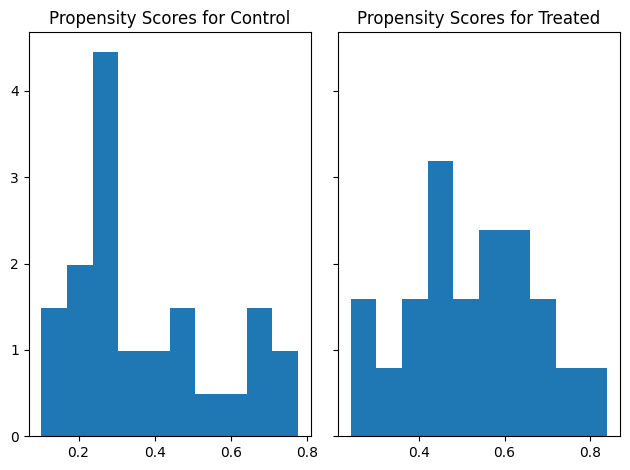

In [99]:
# Visualize the propensity scores
trimmed = stem_data[(stem_data['STEM? p_score'] > 0.1) & (stem_data['STEM? p_score'] < 0.9)]
t = trimmed[trimmed["STEM?"] == 1]["STEM? p_score"].values
c = trimmed[trimmed["STEM?"] == 0]["STEM? p_score"].values
n_bins = 10
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist([c], bins=n_bins, density=True);
axs[1].hist([t], bins=n_bins, density=True)
axs[0].set_title('Propensity Scores for Control')
axs[1].set_title('Propensity Scores for Treated')

# Data Cleaning

In [100]:
# Read in the original data. 
# Note: These are large files and may take a while to load.
committees = pd.read_csv("committees-2024-12-05T15_01_29.csv")
data97 = pd.read_csv("1997to1998.txt", sep='|')
data99 = pd.read_csv("1999to2000.txt", sep='|')
data01 = pd.read_csv("2001to2002.txt", sep='|')
data03 = pd.read_csv("2003to2004.txt", sep='|')
data05 = pd.read_csv("2005to2006.txt", sep='|')
header = pd.read_csv("indiv_header_file.csv")
# Changing the column names to match the header file and concatenating the data.
data97.columns = header.columns
data99.columns = header.columns
data01.columns = header.columns
data03.columns = header.columns
data05.columns = header.columns
ind_cont = pd.concat([data97, data99, data01, data03, data05])
# Merging with the committees data and selecting the relevant columns.
ind_cont = ind_cont[['CMTE_ID', 'TRAN_ID', 'TRANSACTION_AMT', 'TRANSACTION_DT']]
committees = committees[['committee_id', 'name', 'committee_type_full', 'party', 'party_full']]
final_output = committees.merge(ind_cont, left_on='committee_id', right_on='CMTE_ID', how='inner')
final_output.columns = ['com_id', 'com_name', 'com_type', 'com_party', 'com_party_full', 'c_id', 'transaction_id', 'transaction_amt', 'transaction_date']
# Parsing out the parties that are not Republican or Democrat.
parse = final_output[final_output['com_party'].isna() != True]
parse = parse[parse['com_party'] != 'UNK']
# Exporting the data to a csv file.
parse.to_csv('parse.csv', index=False)

C:\Users\david\AppData\Local\Temp\ipykernel_11596\887229054.py:4: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data97 = pd.read_csv("1997to1998.txt", sep='|')
C:\Users\david\AppData\Local\Temp\ipykernel_11596\887229054.py:5: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data99 = pd.read_csv("1999to2000.txt", sep='|')
C:\Users\david\AppData\Local\Temp\ipykernel_11596\887229054.py:6: DtypeWarning: Columns (6,10,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data01 = pd.read_csv("2001to2002.txt", sep='|')
C:\Users\david\AppData\Local\Temp\ipykernel_11596\887229054.py:7: DtypeWarning: Columns (3,5,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data03 = pd.read_csv("2003to2004.txt", sep='|')
C:\Users\david\AppData\Local\Temp\ipykernel_11596\887229054.py:8: DtypeWarning: Columns (10) have mixed types. 

In [101]:
# csv_as_df = pd.read_csv('parse.csv') # Only have to run once when starting notebook

# Copies the original dataframe. Rerun this cell (not the one above) if you modified the data and want to reset
# it to its original state.
# data = csv_as_df.copy(deep=True) 

"""
# CONVERTS transaction_date TO str AND NORMALIZES FORMATTING TO "MMDDYYYY". NaN VALUES CONVERTED TO "99999999" FOR EASY IDENTIFICATION
# ADDS transaction_year COLUMN WITH DTYPE int
# ADDS transaction_month COLUMN WITH DTYPE int

data["transaction_date"] = data["transaction_date"].fillna(99999999)
data["transaction_date"] = data["transaction_date"].astype(str)
data["transaction_date"] = data["transaction_date"].apply(lambda string_date: re.sub("\.0", "", string_date))
data["date_length"] = data["transaction_date"].apply(lambda x: len(x))
data.loc[data.date_length == 7, "transaction_date"] = data.loc[data.date_length == 7, "transaction_date"].apply(lambda x: "0" + x)
data.drop(columns=["date_length"])
data["transaction_year"] = data["transaction_date"].apply(lambda x: x[4:])
assert(len(data["transaction_year"].apply(lambda x: len(x)).value_counts()) == 1)
data["transaction_month"] = data["transaction_date"].apply(lambda x: x[:2])
assert(len(data["transaction_month"].apply(lambda x: len(x)).value_counts()) == 1)
data["transaction_year"] = data["transaction_year"].astype(int)
data["transaction_month"] = data["transaction_month"].astype(int)
"""

"""
# Removes negative transaction amounts (EXPLAIN IN LIMITATIONS)
data = data[data["transaction_amt"] > 0]

# Remove the transactions with year 9999 (previously null values)
data = data[data["transaction_year"] != 9999]

# Remove the transaction_id column because there is no data in it.
data = data.drop(columns=['transaction_id'])

# Add a 'Before or After' column to the data signifying before or after the act was in effect.
# The date that the act was enacted is March 27th 2002, however it took effect in January 1st 2003.
# We will be using January 1st 2003 as the cut-off.
data['before_after'] = data['transaction_year'] >= 2003
data['before_after'] = data['before_after'].map({True: "After", False: "Before"})
data.head(10)
"""

'\n# Removes negative transaction amounts (EXPLAIN IN LIMITATIONS)\ndata = data[data["transaction_amt"] > 0]\n\n# Remove the transactions with year 9999 (previously null values)\ndata = data[data["transaction_year"] != 9999]\n\n# Remove the transaction_id column because there is no data in it.\ndata = data.drop(columns=[\'transaction_id\'])\n\n# Add a \'Before or After\' column to the data signifying before or after the act was in effect.\n# The date that the act was enacted is March 27th 2002, however it took effect in January 1st 2003.\n# We will be using January 1st 2003 as the cut-off.\ndata[\'before_after\'] = data[\'transaction_year\'] >= 2003\ndata[\'before_after\'] = data[\'before_after\'].map({True: "After", False: "Before"})\ndata.head(10)\n'

# Multiple Hypothesis Testing

In [102]:
data = pd.read_csv("cleaned_data.csv")

### Overall question: <u>How did the BCRA change individual contribution donations before and after it was passed?</u>

In [103]:
# DEFINE FUNCTIONS
np.random.seed(42)
def one_simulated_statistic(before, after):
    # shuffle labels
    before_sample = np.random.choice(before['transaction_amt'], size=1000, replace=False)
    after_sample = np.random.choice(after['transaction_amt'], size=1000, replace=False)
    # take means
    mean_before = np.mean(before_sample)
    mean_after = np.mean(after_sample)
    # return difference
    return mean_before, mean_after

### 1. Is there a significant difference in the donation amount ($) of individual contributions before and after the act was implemented? 

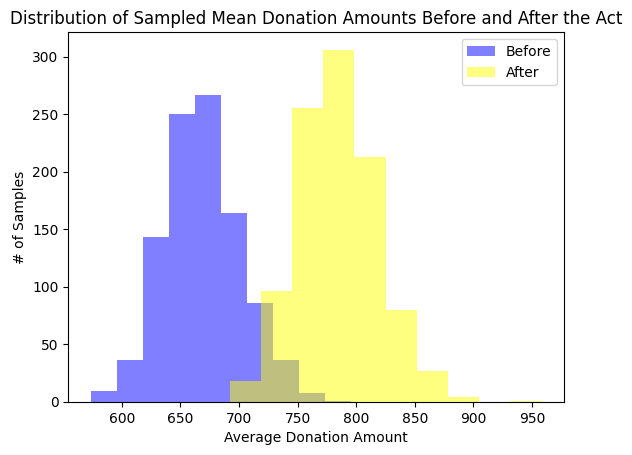

The T-test value and P_value for this test are: (-77.67321370868123, 0.0)


In [104]:
np.random.seed(42)
data1 = data[['before_after', 'transaction_amt']]

# Peform Permutation tests

before1 = data1[data1['before_after'] == 'Before'][['transaction_amt']]
after1 = data1[data1['before_after'] == 'After'][['transaction_amt']]

threshold1 = 2

before_z1 = zscore(before1)
after_z1 = zscore(after1)
before_trimmed1 = before1[(before_z1 < threshold1).all(axis=1)]
after_trimmed1 = after1[(after_z1 < threshold1).all(axis=1)]
b1 = []
f1 = []
n1 = 1000
for i in range(n1):
    mean_before1, mean_after1 = one_simulated_statistic(before_trimmed1, after_trimmed1)
    b1.append(mean_before1)
    f1.append(mean_after1)
t_stat1, p_value1 = ttest_ind(b1, f1, equal_var=False)

plt.hist(b1, alpha=0.5, color='blue', label='Before')
plt.hist(f1, alpha=0.5, color='yellow', label='After')
plt.title("Distribution of Sampled Mean Donation Amounts Before and After the Act")
plt.xlabel("Average Donation Amount")
plt.ylabel("# of Samples")
plt.legend()
plt.show()
print(f"The T-test value and P_value for this test are: {float(t_stat1), float(p_value1)}")

### 2. Is there a significant difference in the average individual contribution donations spending to Democratic committees before and after the act was implemented?

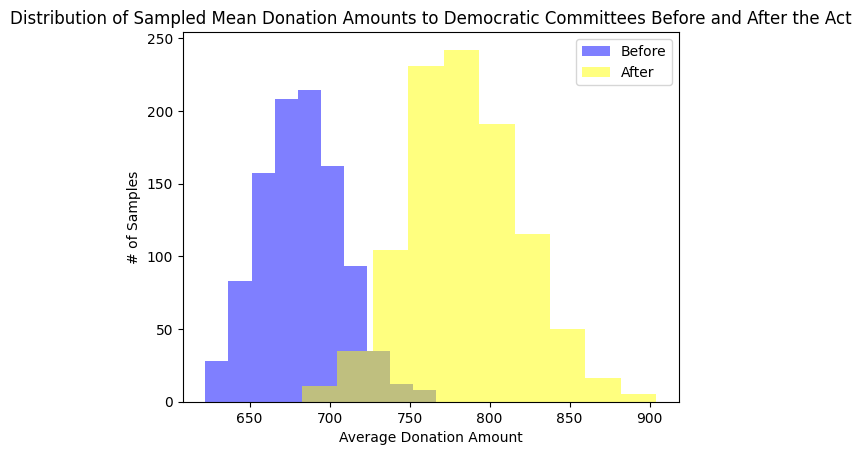

The T-test value and P_value for this test are: (-73.62318723481036, 0.0)


In [105]:
np.random.seed(42)
data2 = data[data['com_party'] == "DEM"][['before_after', 'transaction_amt']]

# Peform Permutation tests

before2 = data2[data2['before_after'] == 'Before'][['transaction_amt']]
after2 = data2[data2['before_after'] == 'After'][['transaction_amt']]

threshold2 = 2

before_z2 = zscore(before2)
after_z2 = zscore(after2)
before_trimmed2 = before2[(before_z2 < threshold2).all(axis=1)]
after_trimmed2 = after2[(after_z2 < threshold2).all(axis=1)]
b2 = []
f2 = []
n2 = 1000
for i in range(n2):
    mean_before2, mean_after2 = one_simulated_statistic(before_trimmed2, after_trimmed2)
    b2.append(mean_before2)
    f2.append(mean_after2)
t_stat2, p_value2 = ttest_ind(b2, f2, equal_var=False)

plt.hist(b2, alpha=0.5, color="blue", label='Before')
plt.hist(f2, alpha=0.5, color="yellow", label='After')
plt.title("Distribution of Sampled Mean Donation Amounts to Democratic Committees Before and After the Act")
plt.xlabel("Average Donation Amount")
plt.ylabel("# of Samples")
plt.legend()
plt.show()
print(f"The T-test value and P_value for this test are: {float(t_stat2), float(p_value2)}")

### 3. Is there a significant difference in the average individual contribution donations spending to Republican committees before and after the act was implemented?

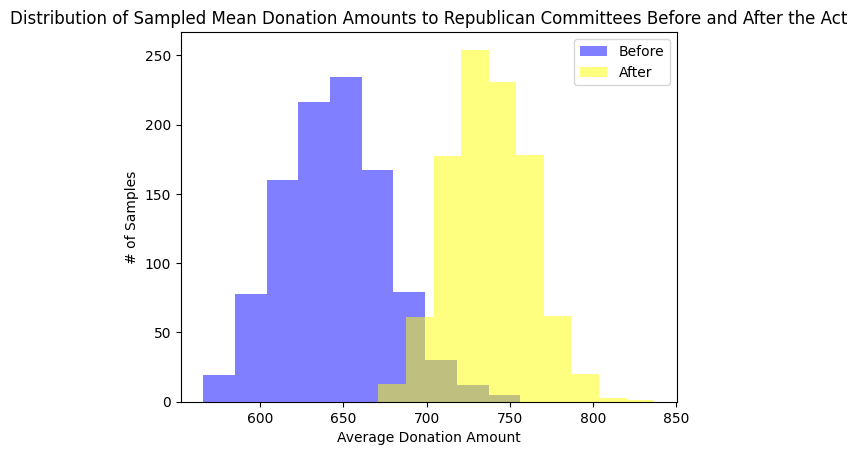

The T-test value and P_value for this test are: (-74.8249941229751, 0.0)


In [106]:
np.random.seed(42)
data3 = data[data['com_party'] == "REP"][['before_after', 'transaction_amt']]

# Peform Permutation tests

before3 = data3[data3['before_after'] == 'Before'][['transaction_amt']]
after3 = data3[data3['before_after'] == 'After'][['transaction_amt']]

threshold3 = 2

before_z3 = zscore(before3)
after_z3 = zscore(after3)
before_trimmed3 = before3[(before_z3 < threshold3).all(axis=1)]
after_trimmed3 = after3[(after_z3 < threshold3).all(axis=1)]
b3 = []
f3 = []
n3 = 1000
for i in range(n3):
    mean_before3, mean_after3 = one_simulated_statistic(before_trimmed3, after_trimmed3)
    b3.append(mean_before3)
    f3.append(mean_after3)
t_stat3, p_value3 = ttest_ind(b3, f3, equal_var=False)

plt.hist(b3, alpha=0.5, color='blue', label='Before')
plt.hist(f3, alpha=0.5, color='yellow', label='After')
plt.title("Distribution of Sampled Mean Donation Amounts to Republican Committees Before and After the Act")
plt.xlabel("Average Donation Amount")
plt.ylabel("# of Samples")
plt.legend()
plt.show()
print(f"The T-test value and P_value for this test are: {float(t_stat3), float(p_value3)}")

### 4. Were individual distributions in 2002 uniformly distributed across the months of the year?

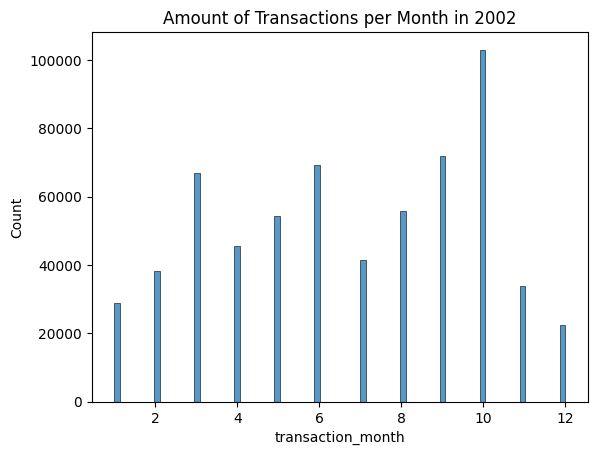

The Chi-Squared value and P_value for this test are: (106687.26977553572, 0.0)


In [107]:
np.random.seed(42)
data4 = data[data['transaction_year']==2002]
sns.histplot(data4['transaction_month'])
plt.title("Amount of Transactions per Month in 2002")
plt.show()

# Manual Chi-Squared Test
expected_donation_amt4 = len(data4['transaction_month'])/12
observed_amt_4 = [len(data4[data4['transaction_month']==x]) for x in np.arange(1, 13)]
something_4 = [(((observed_amt_4[x] - expected_donation_amt4)**2)/expected_donation_amt4) for x in np.arange(12) ]
chi_sq_stat4 = np.sum(something_4)
degreefreedom4 = 12-1

# Scipy Chi-Squared Test
chi2_stat4, p_value4 = chisquare(f_obs=observed_amt_4, f_exp=expected_donation_amt4)
print(f"The Chi-Squared value and P_value for this test are: {float(chi2_stat4), float(p_value4)}")

### 5. Were individual distributions in 2003 uniformly distributed across the months of the year?

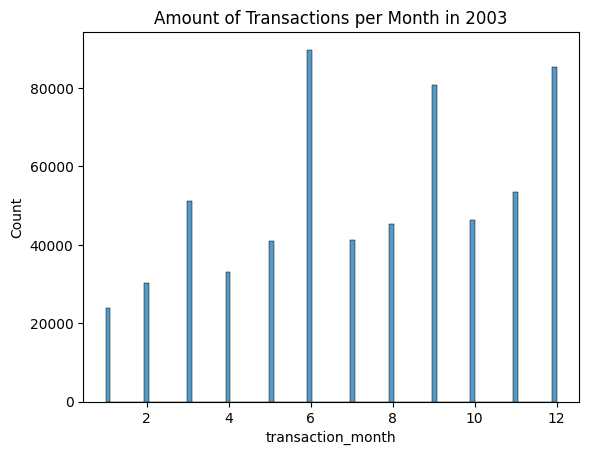

The Chi-Squared value and P_value for this test are: (102922.67018488757, 0.0)


In [108]:
np.random.seed(42)
data5 = data[data['transaction_year']==2003]
sns.histplot(data5['transaction_month'])
plt.title("Amount of Transactions per Month in 2003")
plt.show()

# Manual Chi-Squared Test
expected_donation_amt5 = len(data5['transaction_month'])/12
observed_amt_5 = [len(data5[data5['transaction_month']==x]) for x in np.arange(1, 13)]
something_5 = [(((observed_amt_5[x] - expected_donation_amt5)**2)/expected_donation_amt5) for x in np.arange(12) ]
chi_sq_stat5 = np.sum(something_5)
df5 = 12-1

# Scipy Chi-Squared Test
chi2_stat5, p_value5 = chisquare(f_obs=observed_amt_5, f_exp=expected_donation_amt5)
print(f"The Chi-Squared value and P_value for this test are: {float(chi2_stat5), float(p_value5)}")

### 6. Is the proportion of donations made in October (month 10) 2002 significantly greater than the quantity of donations made in October (month 10) 2003?

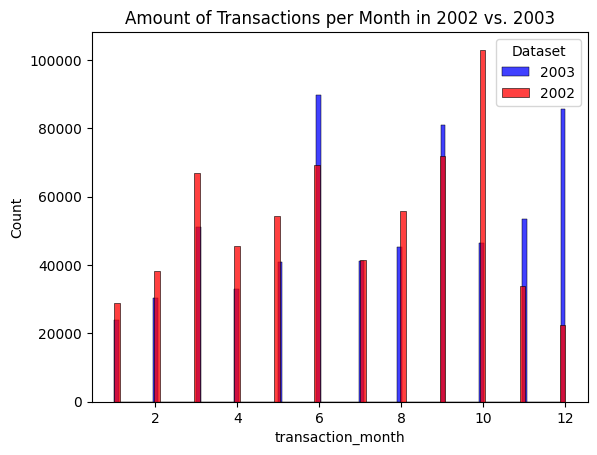

The Z-test value and P_value for test 6 are: (152.89312765766016, 0.0)


In [109]:
np.random.seed(42)
sns.histplot(data5['transaction_month'], color='blue', label='2003')
sns.histplot(data4['transaction_month'], color='red', label='2002')
plt.title("Amount of Transactions per Month in 2002 vs. 2003")
plt.legend(title='Dataset')
plt.show()

data6 = data
october_2002_6 = data6[(data6['transaction_month'] == 10) & (data6['transaction_year'] == 2002)]
october_2003_6 = data6[(data6['transaction_month'] == 10) & (data6['transaction_year'] == 2003)]

# Number of donations in each group
october_2002_donations = len(october_2002_6)
october_2003_donations = len(october_2003_6)

# Total donations in both groups
total_donations_2002 = len(data6[data6['transaction_year'] == 2002])  # Total donations in 2002
total_donations_2003 = len(data6[data6['transaction_year'] == 2003])  # Total donations in 2003

# Use proportions_ztest to compare proportions
count = [october_2002_donations, october_2003_donations]
nobs = [total_donations_2002, total_donations_2003]

# Perform the Z-test for proportions
z_stat6, p_value6 = sm.stats.proportions_ztest(count, nobs, alternative='larger')
print(f"The Z-test value and P_value for test 6 are: {float(z_stat6), float(p_value6)}")

### 7. Is the proportion of donations made in October (month 10) 2004 significantly greater than the quantity of donations made in October (month 10) 2003?

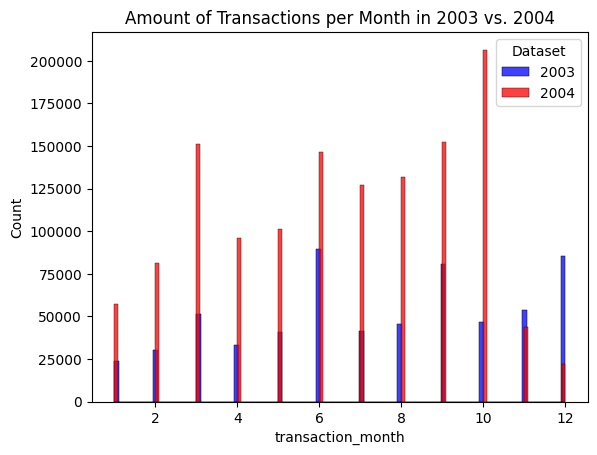

The Z-test value and P_value for test 7 are: (158.39376512767294, 0.0)


In [110]:
np.random.seed(42)
sns.histplot(data5['transaction_month'], color='blue', label='2003')
sns.histplot(data[data["transaction_year"]==2004]['transaction_month'], color='red', label='2004')
plt.title("Amount of Transactions per Month in 2003 vs. 2004")
plt.legend(title='Dataset')
plt.show()

data7 = data
october_2004_7 = data7[(data7['transaction_month'] == 10) & (data7['transaction_year'] == 2004)]
october_2003_7 = data7[(data7['transaction_month'] == 10) & (data7['transaction_year'] == 2003)]

# Number of donations in each group
october_2004_donations7 = len(october_2004_7)
october_2003_donations7 = len(october_2003_7)

# Total donations in both groups
total_donations_2004_7 = len(data7[data7['transaction_year'] == 2004])  # Total donations in 2004
total_donations_2003_7 = len(data7[data7['transaction_year'] == 2003])  # Total donations in 2003

# Use proportions_ztest to compare proportions
count = [october_2004_donations7, october_2003_donations7]
nobs = [total_donations_2004_7, total_donations_2003_7]

# Perform the Z-test for proportions
z_stat7, p_value7 = sm.stats.proportions_ztest(count, nobs, alternative='larger')
print(f"The Z-test value and P_value for test 7 are: {float(z_stat7), float(p_value7)}")

# Error Control (Bonferroni and Benjamini-Hochberg Corrections)

In [111]:
p_values = [p_value1, p_value2, p_value3, p_value4, p_value5, p_value6, p_value7]

# Question 1: Did the BCRA have an effect on individual contributions?
question1_pvalues = p_values[:5]

# Question 2: Is there a meaningful difference in when donations are made during election years versus non-election years?
question2_pvalues = p_values[5:]

print(question1_pvalues, question2_pvalues)

[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)] [np.float64(0.0), np.float64(0.0)]


### Bonferroni Correction

In [118]:
# Question 1: Did the BCRA have an effect on individual contributions?

# 4 tests, alpha = 0.05 --> Control for FWER of a / 5 = 0.01 --> (1 - 0.01)**5 = ~0.95 Confidence
q1_num_tests = 5
alpha = 0.05
q1_bonferroni_threshold = alpha / q1_num_tests
q1_bonferroni_threshold

q1_num_bonf_discoveries = sum([1 if p_value < q1_bonferroni_threshold else 0 for p_value in question1_pvalues])
print(f"The # of Bonferroni Discoveries are: {q1_num_bonf_discoveries}.")

The # of Bonferroni Discoveries are: 5.


In [113]:
# Question 2: Is there a meaningful difference in when donations are made during election years versus non-election years?

# 2 tests, alpha = 0.05 --> Control for FWER of a / 2 = 0.025 --> (1 - 0.025)**2 = ~0.95 Confidence
q2_num_tests = 2
alpha = 0.05
q2_bonferroni_threshold = alpha / q2_num_tests
q2_bonferroni_threshold

q2_num_bonf_discoveries = sum([1 if p_value < q2_bonferroni_threshold else 0 for p_value in question2_pvalues])
print(f"The # of Bonferroni Discoveries are: {q2_num_bonf_discoveries}.")

The # of Bonferroni Discoveries are: 2.


### Benjamini-Hochberg Correction

In [114]:
# REFERENCED FROM LAB 2
def benjamini_hochberg(p_values, alpha):
    """
    Returns decisions on p-values using Benjamini-Hochberg.
    
    Inputs:
        p_values: array of p-values
        alpha: desired FDR (FDR = E[# false positives / # positives])
    
    Returns:
        decisions: binary array of same length as p-values, where `decisions[i]` is 1
        if `p_values[i]` is deemed significant, and 0 otherwise
    """
    p_values_copy = np.array(p_values)

    sorted = np.sort(p_values)
    n = len(p_values)
    desired_fdr = alpha / n
    max_p = sorted[0]

    for i in range(n):
        if sorted[i] <= (i + 1) * desired_fdr:
            if max_p < sorted[i]:
                max_p = sorted[i]

    decisions = [p <= max_p for p in p_values_copy]
    return decisions

In [115]:
# Question 1: Did the BCRA have an effect on individual contributions?

alpha = 0.05 # Desired False Discovery Rate

q1_num_BH_discoveries = sum(benjamini_hochberg(question1_pvalues, alpha))
print(f"The # of Benjamini-Hochberg Discoveries are: {int(q1_num_BH_discoveries)}.")

The # of Benjamini-Hochberg Discoveries are: 5.


In [116]:
# Question 2: Is there a meaningful difference in when donations are made during election years versus non-election years?

alpha = 0.05 # Desired False Discovery Rate

q2_num_BH_discoveries = sum(benjamini_hochberg(question2_pvalues, alpha))
print(f"The # of Benjamini-Hochberg Discoveries are: {int(q2_num_BH_discoveries)}.")

The # of Benjamini-Hochberg Discoveries are: 2.
